# 1. Introduction

Indian Premiere League is a 20 over cricket tournament played in India every year. It comprises of 8 teams representing the 8 Indian cities and is one of the most watched cricket tournaments around the world. It is also one of the most cash rich leagues in cricket.

In this project I have analyzed the data of IPL matches from 2008 to 2019 to gather insights. The current edition of IPL 2020 has not been included in the analysis. The data has been collected from the Kaggle website (https://www.kaggle.com/nowke9/ipldata).

![caption](files/ipl_banner.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Gathering

The data has been gathered from the Kaggle website and has been downloaded in a csv format into the local drive.

In [2]:
# Reading the match data from the csv file
match = pd.read_csv(r'C:\Users\srini\Projects\IPL\matches.csv')
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [3]:
# Reading the data for each ball 
ball= pd.read_csv(r'C:\Users\srini\Projects\IPL\deliveries.csv')
ball.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


# 3. Data Wrangling

### 3.1 Missing Values

In [4]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


So there are total 756 matches with 752 decided winners. Let us see which rows do not have any decided winner.

In [5]:
match[match.isna()['winner']]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


So these matches were probably washed from the rains and did not have any results declared.

In [6]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

This dataframe has missing values only for player dismissed and dismissal_kind. <br>

The data type for all the columns also seem to be okay.

### 3.2 Duplicate values

In [7]:
match.duplicated().sum()

0

In [8]:
ball.duplicated().sum()

23

In [9]:
ball[ball.duplicated()].head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [10]:
ball.query('match_id==221 & inning==1 & over==4 & ball==1')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
52169,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


So these duplicate values need to be removed as they dont add any value.

In [11]:
ball.drop_duplicates(inplace= True)

### 3.3 Renaming Franchise team names
Some teams like Deccan Chargers/ Sunrisers Hyderabad can be grouped together as they were the same teams.

In [12]:
# Replacing Franchise names
ball.replace({'Sunrisers Hyderabad':'Hyderabad (Sunriser/Chargers)','Deccan Chargers':'Hyderabad (Sunriser/Chargers)',\
'Rising Pune Supergiants':'Pune (Supergiant/ Warriors)','Delhi Daredevils':'Delhi (Capitals/ Daredevils)',\
'Delhi Capitals':'Delhi (Capitals/ Daredevils)','Pune Warriors':'Pune (Supergiant/ Warriors)',
'Rising Pune Supergiant':'Pune (Supergiant/ Warriors)'}, inplace= True)

In [13]:
ball.batting_team.unique()

array(['Hyderabad (Sunriser/Chargers)', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Pune (Supergiant/ Warriors)', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Delhi (Capitals/ Daredevils)', 'Chennai Super Kings',
       'Rajasthan Royals', 'Kochi Tuskers Kerala'], dtype=object)

In [14]:
match.replace({'Sunrisers Hyderabad':'Hyderabad (Sunriser/Chargers)','Deccan Chargers':'Hyderabad (Sunriser/Chargers)',\
'Rising Pune Supergiants':'Pune (Supergiant/ Warriors)','Delhi Daredevils':'Delhi (Capitals/ Daredevils)',\
'Delhi Capitals':'Delhi (Capitals/ Daredevils)','Pune Warriors':'Pune (Supergiant/ Warriors)',
'Rising Pune Supergiant':'Pune (Supergiant/ Warriors)'}, inplace= True)

In [15]:
match.team2.nunique()

11

### 3.4 Creating summary dataframes from ball dataframe

In [16]:
# Creating a new df summarizing total runs and wickets that fell in each innings

summary= ball.groupby(by=['match_id','inning','batting_team']).sum()['total_runs'].reset_index()
temp = ball.groupby(by=['match_id','inning','batting_team']).count()['player_dismissed'].reset_index()

summary= pd.merge(summary, temp,how='outer', on= ['match_id','inning', 'batting_team'])

In [17]:
# Creating a new column combining the over and the ball bowled
ball['over_ball']= ball['over']+ball['ball']/10

In [18]:
# Merging the total balls used in the innings with the summary data
temp= ball.groupby(by=['match_id','inning','batting_team']).max()['over_ball'].reset_index()

summary= pd.merge(summary, temp,how='outer', on= ['match_id','inning', 'batting_team'])
summary.head(2)

,match_id,inning,batting_team,total_runs,player_dismissed,over_ball
0,1,1,Hyderabad (Sunriser/Chargers),207,4,20.6
1,1,2,Royal Challengers Bangalore,172,10,20.4


In [19]:
# Changing the matrix into a long format
s1 = summary.melt(id_vars=['match_id','inning',]).query('variable=="total_runs" & inning==1')[['match_id','value']]
s2 =summary.melt(id_vars=['match_id','inning',]).query('variable=="total_runs" & inning==2')[['match_id','value']]
temp= pd.merge(s1, s2, on='match_id', how='inner')

s1= summary.melt(id_vars=['match_id','inning',]).query('variable=="over_ball" & inning==1')[['match_id','value']]
s2=summary.melt(id_vars=['match_id','inning',]).query('variable=="over_ball" & inning==2')[['match_id','value']]
temp2= pd.merge(s1,s2,on='match_id', how='inner')

s1= summary.melt(id_vars=['match_id','inning',]).query('variable=="player_dismissed" & inning==1')[['match_id','value']]
s2=summary.melt(id_vars=['match_id','inning',]).query('variable=="player_dismissed" & inning==2')[['match_id','value']]
temp3 = pd.merge(s1,s2,on='match_id', how='inner')

summary = pd.merge(pd.merge(temp,temp2, on= 'match_id', how='inner'), temp3, on='match_id', how='inner')

summary.rename(columns={'value_x_x':'runs_1', 'value_y_x':'runs_2','value_x_y':'overs_1','value_y_y':'overs_2',\
    'value_x':'wickets_1', 'value_y':'wickets_2'}, inplace= True)
summary.head()

,match_id,runs_1,runs_2,overs_1,overs_2,wickets_1,wickets_2
0,1,207,172,20.6,20.4,4,10
1,2,184,187,20.7,20.5,8,3
2,3,183,184,20.6,15.7,4,0
3,4,163,164,20.6,19.7,6,4
4,5,157,142,20.6,20.6,8,9


In [20]:
# Merging the summary data with match info data
match= pd.merge(match, summary, right_on= 'match_id', left_on= 'id', how='left')

### 3.5 Droppping umpire information as it is not essential for our analysis

In [21]:
match.drop(columns=['umpire1', 'umpire2', 'umpire3'], inplace= True)

In [22]:
match.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_wickets,player_of_match,venue,match_id,runs_1,runs_2,overs_1,overs_2,wickets_1,wickets_2
0,1,2017,Hyderabad,2017-04-05,Hyderabad (Sunriser/Chargers),Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",1.0,207,172,20.6,20.4,4,10
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune (Supergiant/ Warriors),Pune (Supergiant/ Warriors),field,normal,0,...,7,SPD Smith,Maharashtra Cricket Association Stadium,2.0,184,187,20.7,20.5,8,3


### 3.6 Creating a batsman summary dataframe

In [23]:
# Total runs scored by each batsman
batsman= ball.groupby(by='batsman').sum()['batsman_runs'].reset_index()

#Total balls played by each batsman
temp = ball.groupby(by='batsman').count()['ball']
batsman= pd.merge(batsman, temp, how='outer',on='batsman')

# Total 4s hit
temp = ball.query('batsman_runs==4').groupby(by='batsman').count()['batsman_runs'].reset_index()
batsman = pd.merge(batsman, temp, how='outer',on='batsman')

#Total 6s hit
temp= ball.query('batsman_runs==6').groupby(by='batsman').count()['batsman_runs'].reset_index()
batsman = pd.merge(batsman, temp, how='outer',on='batsman')

batsman.rename(columns={'batsman_runs_x':'total_runs','batsman_runs_y':'4s', 'batsman_runs':'6s'}, inplace= True)
batsman.head(3)

,batsman,total_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,NaN,NaN
2,A Chopra,53,75,7.0,NaN


In [24]:
# Calculating the strike rate
batsman['strike_rate']= (batsman.total_runs/ batsman.ball)*100
batsman.head(2)

,batsman,total_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,NaN,NaN,57.142857


In [25]:
# Calculating percent of the runs scored by boundries
batsman['boundary_percent']= (batsman['4s']*4+ batsman['6s']*6)/ batsman.total_runs
batsman.head(1)

,batsman,total_runs,ball,4s,6s,strike_rate,boundary_percent
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,0.55


In [26]:
# Calculating the runs scored by openers in each match
#calculating the runs scored by each batsman in each match
a= ball.groupby(by=['match_id','batsman']).sum()['batsman_runs']
b= ball.groupby(by=['match_id','batsman']).count()['total_runs']
opening = pd.DataFrame(data=[a,b]).transpose().reset_index()

# finding which batsmen opened
opening2= ball.query('over==1 & ball==1')[['match_id','batsman','non_striker']].melt(id_vars='match_id')
opening = pd.merge(opening, opening2, how='right',left_on =['match_id','batsman'], right_on=['match_id','value'])

#renaming columns
opening.rename(columns={'total_runs':'opening_balls', 'batsman_runs':'opening_runs'}, inplace= True)
#dropping redundant columns
opening.drop(columns=['variable','value'], inplace= True)
opening.head()

,match_id,batsman,opening_runs,opening_balls
0,1,CH Gayle,32.0,23.0
1,1,DA Warner,14.0,9.0
2,1,Mandeep Singh,24.0,16.0
3,1,S Dhawan,40.0,31.0
4,2,AM Rahane,60.0,34.0


In [27]:
# Aggregating the runs scored by openers
opening= opening.groupby(by='batsman').sum()[['opening_runs','opening_balls']].reset_index()

batsman= pd.merge(batsman, opening, on='batsman', how='left')
batsman.head(3)

,batsman,total_runs,ball,4s,6s,strike_rate,boundary_percent,opening_runs,opening_balls
0,A Ashish Reddy,280,196,16.0,15.0,142.857143,0.55,NaN,NaN
1,A Chandila,4,7,NaN,NaN,57.142857,NaN,NaN,NaN
2,A Chopra,53,75,7.0,NaN,70.666667,NaN,40.0,52.0


### 3.7 Creating a bowler summary dataframe

In [28]:
ball.dismissal_kind.value_counts()

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

For calculating the wickets picked by the bowler we need to exclude the run outs, retired hurt and obstructing the field. There are actually 2 dismissals for obstructing the field!!! <br>

A quick Google search reveals that they were probable runouts but the batsmen (Yusuf Pathan and Amit Mishra) blocked the ball from hitting the stumps and hence were declared out.

In [29]:
ball.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,over_ball
0,1,1,Hyderabad (Sunriser/Chargers),Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1.1
1,1,1,Hyderabad (Sunriser/Chargers),Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,1.2


In [30]:
# Total balls bowled and total runs given by the bowler
bowler= ball.groupby(by='bowler').count()['ball'].reset_index()
temp= ball.groupby(by='bowler').sum()['total_runs']

bowler= pd.merge(bowler, temp, on='bowler', how='outer')

In [31]:
# Filtering the runouts/ retired hurts
temp = ball.query('dismissal_kind!="obstructing the field" & dismissal_kind !="retired hurt" & dismissal_kind != "run out"')

# Filtering the wickets taken
temp = temp[~temp.isna().dismissal_kind][['bowler','dismissal_kind']]
temp= temp.groupby(by=['bowler']).count().reset_index()

bowler= pd.merge(bowler, temp, on='bowler', how='outer')

In [32]:
# Renaming the column to reflect the wickets
bowler.rename(columns={'dismissal_kind':'wickets_taken'}, inplace= True)

In [33]:
# Calculating the total dot balls
temp = ball.query('total_runs==0').groupby(by='bowler').count()['ball'].reset_index()
bowler= pd.merge(bowler, temp, on='bowler', how='outer')

In [34]:
# Renaming the column to reflect the wickets
bowler.rename(columns={'ball_x':'balls_bowled', 'ball_y':'dot_balls'}, inplace= True)
bowler.head(1)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls
0,A Ashish Reddy,270,400,18.0,79.0


In [35]:
# Calculating the number of bowled and LBWs taken by the bowler
temp =ball.query('dismissal_kind=="bowled" | dismissal_kind =="lbw" ').groupby(by='bowler').count()['dismissal_kind'].reset_index()
bowler= pd.merge(bowler, temp, on='bowler', how='outer')
bowler.head(3)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,dismissal_kind
0,A Ashish Reddy,270,400,18.0,79.0,9.0
1,A Chandila,234,245,11.0,103.0,NaN
2,A Choudhary,108,144,5.0,42.0,NaN


In [36]:
# Renaming the column to reflect the wickets
bowler.rename(columns={'dismissal_kind':'bowl_or_lbw'}, inplace= True)

In [37]:
bowler.head(1)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw
0,A Ashish Reddy,270,400,18.0,79.0,9.0


In [38]:
# Calculating the bowler economy
bowler['economy']= bowler.total_runs/ (bowler.balls_bowled/6)

In [39]:
# Calculating dot ball percent
bowler['dot_ball_percent']= bowler.dot_balls/bowler.balls_bowled

In [40]:
# Calculating the runs scored in last 3 overs (death over) to compare the bowlers performance
a= ball.query('over>=18').groupby('bowler').sum()['total_runs']
b= ball.query('over>=18').groupby('bowler').count()['batsman_runs']
temp =pd.DataFrame(data=[a,b] ).transpose().reset_index()
temp.rename(columns={'total_runs':'death_runs','batsman_runs':'death_balls' }, inplace= True)

bowler= pd.merge(bowler, temp, on='bowler', how='outer')
bowler.head(3)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw,economy,dot_ball_percent,death_runs,death_balls
0,A Ashish Reddy,270,400,18.0,79.0,9.0,8.888889,0.292593,73.0,38.0
1,A Chandila,234,245,11.0,103.0,NaN,6.282051,0.440171,NaN,NaN
2,A Choudhary,108,144,5.0,42.0,NaN,8.000000,0.388889,29.0,21.0


In [41]:
# Calculating bowling economy in death over
bowler['death_econ']= bowler.death_runs/ (bowler.death_balls/6)

In [42]:
# Calculating the percentage of bowled and LBWs by the bowler among the wickets they took
bowler['bowl_lbw_percent']= bowler.bowl_or_lbw/ bowler.wickets_taken

In [43]:
bowler.head(1)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw,economy,dot_ball_percent,death_runs,death_balls,death_econ,bowl_lbw_percent
0,A Ashish Reddy,270,400,18.0,79.0,9.0,8.888889,0.292593,73.0,38.0,11.526316,0.5


### 3.8 Team inning summary
To calculate over wise run scoring for each team

In [44]:
# Total innings played for each over bowled
overs_played= ball[['batting_team','over','match_id']].drop_duplicates().groupby(by=['batting_team','over']).count()['match_id'].reset_index()

In [45]:
# Total runs scored in each over
over_runs= ball.groupby(by=['batting_team','over']).sum()['total_runs'].reset_index()
over_runs= pd.merge(over_runs, overs_played, on=['batting_team','over'], how='outer')

over_runs.rename(columns={'match_id':'matches'}, inplace= True)

In [46]:
# Calculating average runs scored in each over
over_runs['avg']= over_runs.total_runs/ over_runs.matches

In [47]:
over_runs.head()

,batting_team,over,total_runs,matches,avg
0,Chennai Super Kings,1,870,164,5.304878
1,Chennai Super Kings,2,1116,164,6.804878
2,Chennai Super Kings,3,1293,164,7.884146
3,Chennai Super Kings,4,1354,164,8.256098
4,Chennai Super Kings,5,1423,164,8.676829


### 3.9 Changing the datatype for Match columns

In [48]:
# Changing the data type for the match columns to float values
float_list=['runs_1', 'runs_2','overs_1', 'overs_2','wickets_1', 'wickets_2' ]
for col in float_list:
    match.loc[:,col] = match[col].astype(float)
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 755
Data columns (total 22 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
match_id           754 non-null float64
runs_1             754 non-null float64
runs_2             754 non-null float64
overs_1            754 non-null float64
overs_2            754 non-null float64
wickets_1          754 non-null float64
wickets_2          754 non-null float64
dtypes: float64(7), int64(5), objec

### 3.10 Replacing the city names that are same

In [49]:
match.replace({'Bengaluru':'Bangalore'}, inplace= True)

### 3.11 Which team won the match (batting or fielding first)

In [50]:
match['batting_first_won']= match.winner== match.team1

# 4. Exploratory Data Analysis

### 4.1. Average runs scored in each over

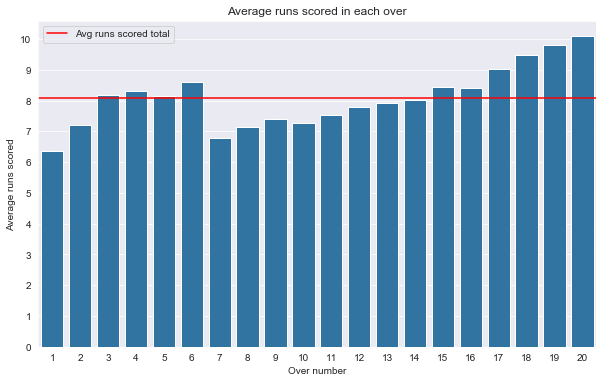

In [51]:
# Plotting average runs scored in each over in IPL
series= over_runs.groupby(by='over').mean()['avg']
sns.set_style('darkgrid')

plt.figure(figsize=(10,6))
sns.barplot(x=series.index, y=series, color='tab:blue', )
plt.axhline(over_runs.avg.mean(), color='r', label= 'Avg runs scored total')
plt.title('Average runs scored in each over')
plt.ylabel('Average runs scored')
plt.xlabel('Over number')
plt.yticks(np.arange(0,11))
plt.legend()
plt.show()

To see trends of the average runs scored in each over I plotted a barplot between the over and the runs scored in that over. On an average teams score approximately 8 runs per over.

However, almost all teams have a cautious start to the innings scoring between 6-7 runs in the first 2 overs and accelerating in the next 4 overs before the powerplay ends. 

The slog overs 17+ see on an average 9-10 runs being scored per over.

### Average runs scored per over team wise

In [52]:
color_code= {'Chennai Super Kings':'y','Delhi (Capitals/ Daredevils)':'b','Hyderabad (Sunriser/Chargers)':'tab:orange',\
  'Kings XI Punjab':'r', 'Kolkata Knight Riders':'k','Mumbai Indians':'tab:blue','Rajasthan Royals':'tab:pink',\
     'Royal Challengers Bangalore':'tab:red'}

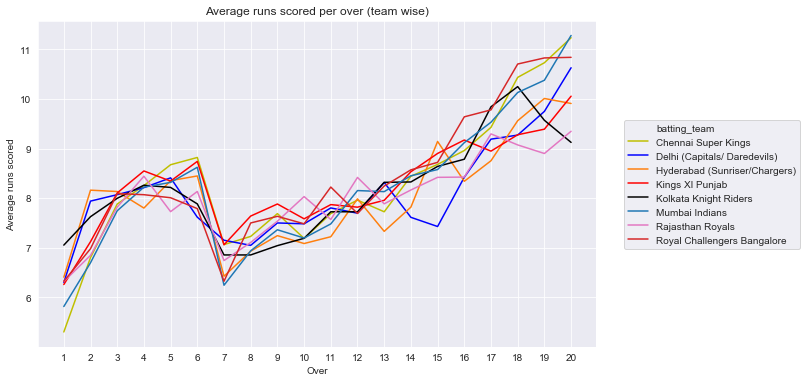

In [53]:
# Average runs scored per over team wise
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))

temp= over_runs.query('batting_team !="Kochi Tuskers Kerala" & batting_team != "Pune (Supergiant/ Warriors)" & \
batting_team !="Gujarat Lions"')
sns.lineplot(x='over', y='avg', data=temp, hue='batting_team', palette=color_code)
plt.xticks(np.arange(1,21))
plt.legend(loc=(1.05,0.3))
plt.title('Average runs scored per over (team wise)')
plt.xlabel('Over')
plt.ylabel('Average runs scored')
plt.show()

Chennai Super Kings makes one of the slowest starts among all the IPL teams but finishes among the highest run scorers in the last few overs. It starts by scoring about 2-3 runs in the first over, compared to 7 runs scored by Kolkata Knight Riders (KKR).

However, CSK finished with about 11+ runs in the final over compared to only 9 runs by KKR.

The trends of runs scored among all the teams see similar peaks and valleys

### 4.2 Winning percent team and inning wise

In [82]:
# Grouping the wins for teams batting first and second
temp = match.groupby(by=['winner','team1']).count()['id'].reset_index().query('winner==team1')[['winner','id']]
temp2 = match.groupby(by=['winner','team2']).count()['id'].reset_index().query('winner==team2')[['winner','id']]
temp3= pd.DataFrame([match.team1.value_counts(),match.team2.value_counts()],).transpose().reset_index()

team_stat= pd.merge(temp, temp2, on='winner', how='inner')
team_stat= pd.merge(team_stat, temp3, left_on='winner',right_on='index', how='inner')

team_stat.rename(columns={'id_x':'batting_first','id_y':'batting_second'}, inplace= True)
team_stat.drop(columns=['index'], inplace= True)

In [83]:
# finding win percent inning wise
team_stat['win_percent_first']= team_stat['batting_first']/ team_stat['team1']
team_stat['win_percent_second']= team_stat['batting_second']/ team_stat['team2']

In [84]:
# Aggregating the win percent
team_stat['win_percent']=(team_stat.batting_first+ team_stat.batting_second)/ (team_stat.team1+ team_stat.team2)

In [85]:
# Sorting the values
team_stat.sort_values(by='win_percent', inplace=True, ascending=False)

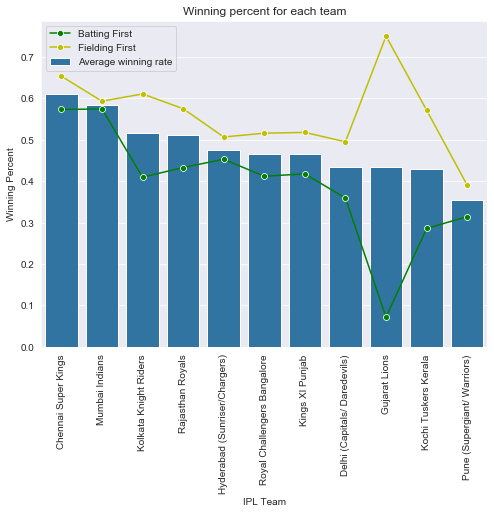

In [58]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')

sns.lineplot(x= 'winner', y= 'win_percent_first',data=team_stat, color='g',label='Batting First', sort= False, marker='o' )
sns.lineplot(x= 'winner', y= 'win_percent_second', data=team_stat, color='y', label= 'Fielding First',sort=False,marker='o')
sns.barplot(x='winner', y= 'win_percent',data=team_stat,  color='tab:blue', label='Average winning rate')

plt.xticks(rotation=90)
plt.xlabel('IPL Team')
plt.ylabel('Winning Percent')
plt.title('Winning percent for each team')
plt.legend()
plt.show()

Unsurprisingly, CSK has one of the highest win percents in the IPL games winning about 61% of its games. However, it has a slightly better chasing record (65%) than a batting first record (57% wins). Interstingly, all the teams have a better chasing record than batting first record (chasing team wins 55% matches).

This difference is most prominent in Kolkata Knight Riders who have a win percent of 61% chasing but only 41% batting first. Similary, Rajasthan Royals also have a large gap between the chasing (57.5%) and batting first (43%) win percents. Mumbai Indians has almost similar winning percent for both batting and fielding first (57% and 59% respectively).

In [87]:
team_stat

,winner,batting_first,batting_second,team1,team2,win_percent_first,win_percent_second,win_percent
0,Chennai Super Kings,51,49,89,75,0.573034,0.653333,0.609756
7,Mumbai Indians,58,51,101,86,0.574257,0.593023,0.582888
6,Kolkata Knight Riders,34,58,83,95,0.409639,0.610526,0.516854
9,Rajasthan Royals,29,46,67,80,0.432836,0.575000,0.510204
3,Hyderabad (Sunriser/Chargers),48,39,106,77,0.452830,0.506494,0.475410
10,Royal Challengers Bangalore,35,49,85,95,0.411765,0.515789,0.466667
4,Kings XI Punjab,38,44,91,85,0.417582,0.517647,0.465909
1,Delhi (Capitals/ Daredevils),28,49,78,99,0.358974,0.494949,0.435028
2,Gujarat Lions,1,12,14,16,0.071429,0.750000,0.433333
5,Kochi Tuskers Kerala,2,4,7,7,0.285714,0.571429,0.428571


### Cliffhanger matches
We need to see how many matches were decided in the last over to see if they were cliffhanger matches. 

To see this we will find how many times Team 2 won the match after the 20.3th over and how many times Team 1 won by less than 6 runs (maximum runs that can be scored on a ball).

In [59]:
# Finding matches where Team 1 won by less than 6 runs or Team 2 won in last 3 balls
cliff= match.query('(win_by_runs <6 & win_by_runs >0) | (overs_2 > 20.3 & win_by_wickets >0)')

In [60]:
cliff.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,match_id,runs_1,runs_2,overs_1,overs_2,wickets_1,wickets_2,batting_first_won
1,2,2017,Pune,2017-04-06,Mumbai Indians,Pune (Supergiant/ Warriors),Pune (Supergiant/ Warriors),field,normal,0,...,SPD Smith,Maharashtra Cricket Association Stadium,2.0,184.0,187.0,20.7,20.5,8.0,3.0,False
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,N Rana,Wankhede Stadium,7.0,178.0,180.0,20.8,20.5,7.0,6.0,False


In [61]:
# Grouping the wins for teams batting first and second
temp = cliff.groupby(by=['winner','team1']).count()['id'].reset_index().query('winner==team1')[['winner','id']]
temp2 = cliff.groupby(by=['winner','team2']).count()['id'].reset_index().query('winner==team2')[['winner','id']]
temp3= pd.DataFrame([cliff.team1.value_counts(),cliff.team2.value_counts()],).transpose().reset_index()

team_stat2= pd.merge(temp, temp2, on='winner', how='inner')
team_stat2= pd.merge(team_stat2, temp3, left_on='winner',right_on='index', how='inner')

team_stat2.rename(columns={'id_x':'batting_first','id_y':'batting_second'}, inplace= True)
team_stat2.drop(columns=['index'], inplace= True)

# finding win percent inning wise
team_stat2['win_percent_first']= team_stat2['batting_first']/ team_stat2['team1']
team_stat2['win_percent_second']= team_stat2['batting_second']/ team_stat2['team2']

# Aggregating the win percent
team_stat2['win_percent']=(team_stat2.batting_first+ team_stat2.batting_second)/ (team_stat2.team1+ team_stat2.team2)

In [62]:
team_stat2['total_wins']= team_stat2.batting_first + team_stat2.batting_second

# Sorting the values
team_stat2.sort_values(by='total_wins', inplace=True, ascending=False)
team_stat2.head()

,winner,batting_first,batting_second,team1,team2,win_percent_first,win_percent_second,win_percent,total_wins
0,Chennai Super Kings,4,21,15,24,0.266667,0.875000,0.641026,25
6,Mumbai Indians,7,13,17,18,0.411765,0.722222,0.571429,20
8,Rajasthan Royals,3,12,8,15,0.375000,0.800000,0.652174,15
4,Kings XI Punjab,7,7,19,12,0.368421,0.583333,0.451613,14
5,Kolkata Knight Riders,2,10,12,15,0.166667,0.666667,0.444444,12


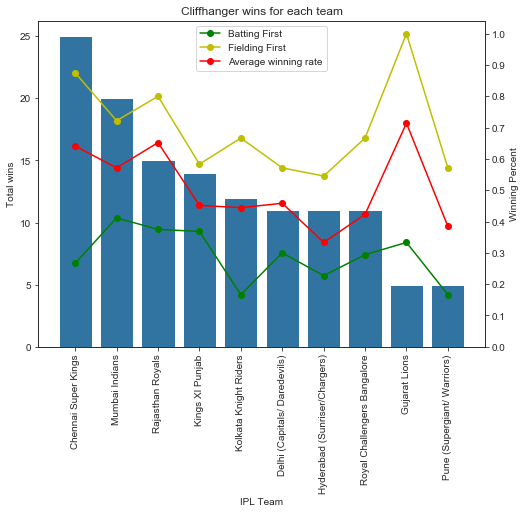

In [63]:
plt.figure(figsize=(8,6))
sns.set_style('ticks')

sns.barplot(team_stat2.winner, team_stat2.total_wins ,label='Total wins', color='tab:blue')
plt.xticks(rotation=90)
plt.xlabel('IPL Team')
plt.ylabel('Total wins')

axes2= plt.twinx()
axes2.plot(team_stat2.winner,team_stat2.win_percent_first ,'g-o',label='Batting First')
axes2.plot(team_stat2.winner,team_stat2.win_percent_second ,'y-o',label='Fielding First')
axes2.plot(team_stat2.winner,team_stat2.win_percent ,'r-o',label='Average winning rate')

plt.ylabel('Winning Percent')
plt.yticks(np.arange(0,1.1,0.1) )
plt.title('Cliffhanger wins for each team')
plt.legend(loc=9 )
plt.show()

Chennais Super Kings are again the kings of winning cliffhanger matches. Among the 24 matches where they were chasing that were decided in the last 3 balls, they won whooping 87% of those games (21 games). Rajasthan Royals won 80% of these types of games (12/15 matches). 

When defending a target Mumbai Indians seem to better at holding the nerves as they won 41% of the matches where the winning margin was less than 6 runs.

Overall CSK and RR have won the most cliffhanger games winning 64% and 65% of these games respectively.

In [64]:
team_stat2

,winner,batting_first,batting_second,team1,team2,win_percent_first,win_percent_second,win_percent,total_wins
0,Chennai Super Kings,4,21,15,24,0.266667,0.875000,0.641026,25
6,Mumbai Indians,7,13,17,18,0.411765,0.722222,0.571429,20
8,Rajasthan Royals,3,12,8,15,0.375000,0.800000,0.652174,15
4,Kings XI Punjab,7,7,19,12,0.368421,0.583333,0.451613,14
5,Kolkata Knight Riders,2,10,12,15,0.166667,0.666667,0.444444,12
1,Delhi (Capitals/ Daredevils),3,8,10,14,0.300000,0.571429,0.458333,11
3,Hyderabad (Sunriser/Chargers),5,6,22,11,0.227273,0.545455,0.333333,11
9,Royal Challengers Bangalore,5,6,17,9,0.294118,0.666667,0.423077,11
2,Gujarat Lions,1,4,3,4,0.333333,1.000000,0.714286,5
7,Pune (Supergiant/ Warriors),1,4,6,7,0.166667,0.571429,0.384615,5


### Distribution of wins
We will next see the distribution of wins for the teams batting first and second.

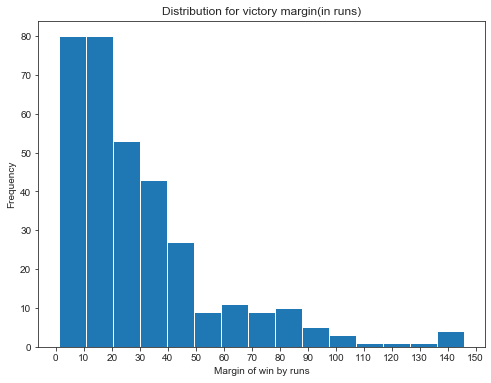

In [65]:
# Distribution for team batting first
temp= match.query('win_by_runs!=0')

plt.figure(figsize=(8,6))
plt.hist(temp.win_by_runs, bins=15)
plt.xticks(np.arange(0,160,10))
plt.xlabel('Margin of win by runs')
plt.ylabel('Frequency')
plt.title('Distribution for victory margin(in runs)')
plt.show()

In [96]:
match.query('batting_first_won==False').shape[0]

421

In [97]:
160/421

0.38004750593824227

Overall, the team batting first won 44.3% of the games while the team batting second won 55.7% of these games.

As the histogram above shows about 24% of the games that were won by the batting first team, the winning margin was less than 10 runs. 

However, 38% of the games won by the winning team were won in the 20th over, showing how close the matches have been.

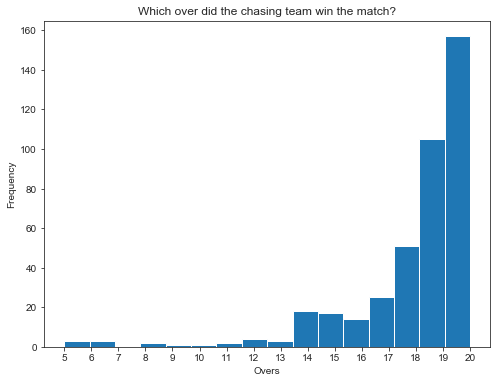

In [66]:
# Distribution for team batting second
temp = match.query('win_by_wickets>0').overs_2.apply(lambda x: int(x))

plt.figure(figsize=(8,6))
plt.hist(temp, bins= 16  )
plt.xticks(np.arange(5,21,1))
plt.xlabel('Overs')
plt.ylabel('Frequency')
plt.title('Which over did the chasing team win the match?')
plt.show()

### Best Batting statistics

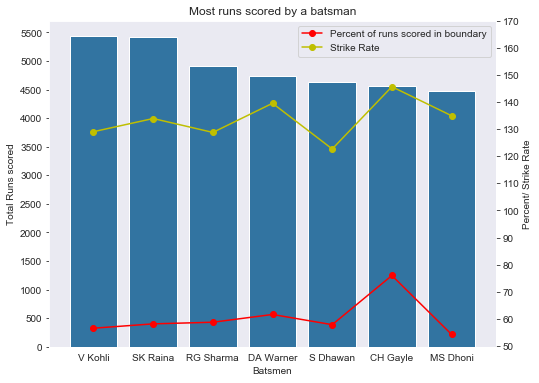

In [98]:
# Most runs scored by a batsman
temp=batsman.sort_values(by='total_runs', ascending= False).head(7)
sns.set_style('dark')

plt.figure(figsize= (8,6))
sns.barplot(x= temp.batsman, y= temp.total_runs, color= 'tab:blue')
plt.ylabel('Total Runs scored')
plt.xlabel('Batsmen')
plt.title('Most runs scored by a batsman')
plt.yticks(np.arange(0,5600,500))

axes2= plt.twinx()
axes2.plot(temp.batsman, temp.boundary_percent*100, 'r-o', label='Percent of runs scored in boundary')
axes2.plot(temp.batsman, temp.strike_rate, 'y-o', label='Strike Rate')
plt.ylabel('Percent/ Strike Rate')
plt.yticks(np.arange(50,180,10))
plt.legend()
plt.show()

Virat Kohli and Suresh Raina are among the highest run scorers in IPL with each scoring more than 5400 runs. However, one of the highest strike rates (145%) among the top batsmen is by Chris Gayle. 

Gayle also has one of the highest number of runs scored in boundaries with a whooping 76% runs being scored in 4s and 6s. David Warner comes next with about 61% runs being scored in boundaries among the top 7 batsmen.

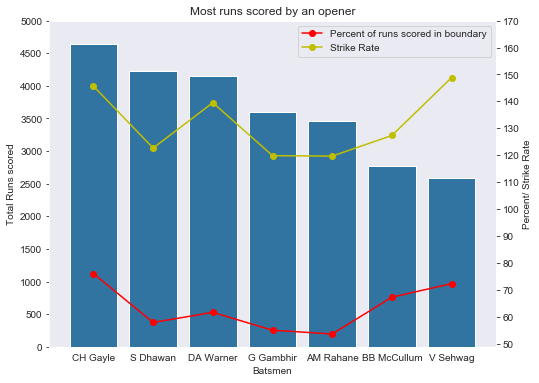

In [101]:
# Most runs scored by an opening batsman
temp=batsman.sort_values(by='opening_runs', ascending= False).head(7)
sns.set_style('dark', )

plt.figure(figsize= (8,6))
sns.barplot(x= temp.batsman, y= temp.opening_runs, color= 'tab:blue')
plt.ylabel('Total Runs scored')
plt.xlabel('Batsmen')
plt.title('Most runs scored by an opener')
plt.yticks(np.arange(0,5100,500))

axes2= plt.twinx()
axes2.plot(temp.batsman, temp.boundary_percent*100, 'r-o', label='Percent of runs scored in boundary')
axes2.plot(temp.batsman, temp.strike_rate, 'y-o', label='Strike Rate')
plt.ylabel('Percent/ Strike Rate')
plt.yticks(np.arange(50,180,10))

plt.legend()
plt.show()

Chris Gayle, Shikhar Dhawan and David Warner are among the highest run scorers for openers having scored more than 4000 runs in the opening position.

Interestingly, Sehwag and McCullum who are also among other top openers, like Gayle, they have also scored 72% and 67% of their runs in boundaries.

### Best Bowling Statistics

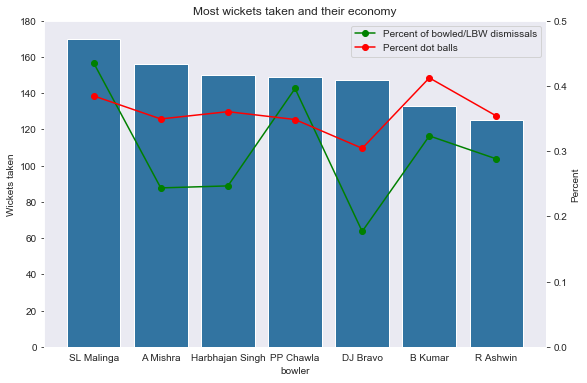

In [103]:
# Most wickets taken
temp= bowler.sort_values(by='wickets_taken', ascending= False).head(7)

plt.figure(figsize=(9,6))
sns.barplot(x= temp.bowler, y= temp.wickets_taken, color= 'tab:blue')
plt.ylabel('Wickets taken')
plt.yticks(np.arange(0,190,20))

axes2= plt.twinx()
axes2.plot(temp.bowler, temp.bowl_lbw_percent, 'g-o', label='Percent of bowled/LBW dismissals')
axes2.plot(temp.bowler, temp.dot_ball_percent, 'r-o', label='Percent dot balls')
plt.ylabel('Percent', )
plt.yticks(np.arange(0,0.6,0.1))
plt.legend()
plt.title('Most wickets taken and their economy')

plt.show()

In [104]:
temp

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw,economy,dot_ball_percent,death_runs,death_balls,death_econ,bowl_lbw_percent
340,SL Malinga,2974,3511,170.0,1144.0,74.0,7.083389,0.384667,935.0,725.0,7.737931,0.435294
7,A Mishra,3172,3850,156.0,1108.0,38.0,7.282472,0.349306,257.0,155.0,9.948387,0.243590
126,Harbhajan Singh,3451,4050,150.0,1244.0,37.0,7.041437,0.360475,122.0,98.0,7.469388,0.246667
264,PP Chawla,3157,4153,149.0,1100.0,59.0,7.892936,0.348432,235.0,128.0,11.015625,0.395973
93,DJ Bravo,2711,3733,147.0,825.0,26.0,8.261896,0.304316,1289.0,780.0,9.915385,0.176871
53,B Kumar,2707,3264,133.0,1116.0,43.0,7.234577,0.412264,1003.0,627.0,9.598086,0.323308
269,R Ashwin,3016,3391,125.0,1067.0,36.0,6.746021,0.353780,232.0,148.0,9.405405,0.288000


S. Malinga, Amit Mishra and Harbhanjan Singh are one of the highest wicket takers in IPL. 43% of the wickets taken by Malinga have been either bowled or LBW showing how effective bowler he is. Piyush Chawla also has a similar bowled/lbw dismisal percent (39%).

Bhuvaneshwar Kumar has one of the highest dot ball percents (41%) among the leading wicket takers slightly ahead of Malinga (38%).

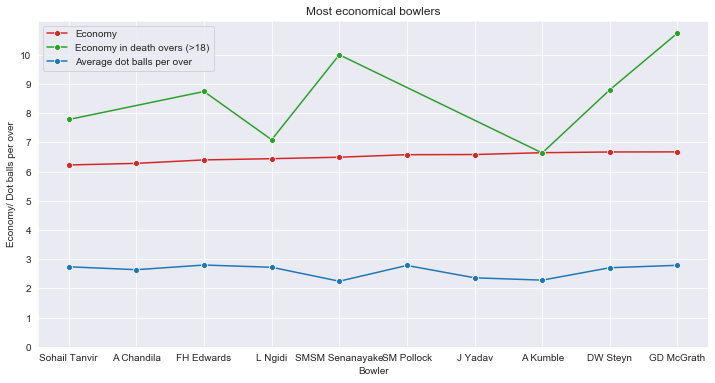

In [144]:
# Bowlers with best economy
temp =bowler.query('balls_bowled > 120').sort_values(by='economy', ascending= True).head(10)
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.lineplot(temp.bowler, temp.economy, color='tab:red', marker='o', label='Economy', sort= False)
sns.lineplot(temp.bowler, temp.death_econ, color='tab:green', marker='o', label='Economy in death overs (>18)', sort= False)
sns.lineplot(temp.bowler, temp.dot_ball_percent*6, color='tab:blue', marker='o', label='Average dot balls per over', sort= False)
plt.yticks(np.arange(0,11,1))
plt.ylabel('Economy/ Dot balls per over')
plt.xlabel('Bowler')
plt.title('Most economical bowlers')
plt.legend()
plt.show()

In [147]:
bowler.query('balls_bowled > 120').sort_values(by='death_balls', ascending= False)

,bowler,balls_bowled,total_runs,wickets_taken,dot_balls,bowl_or_lbw,economy,dot_ball_percent,death_runs,death_balls,death_econ,bowl_lbw_percent
93,DJ Bravo,2711,3733,147.0,825.0,26.0,8.261896,0.304316,1289.0,780.0,9.915385,0.176871
340,SL Malinga,2974,3511,170.0,1144.0,74.0,7.083389,0.384667,935.0,725.0,7.737931,0.435294
53,B Kumar,2707,3264,133.0,1116.0,43.0,7.234577,0.412264,1003.0,627.0,9.598086,0.323308
281,R Vinay Kumar,2186,3043,105.0,763.0,19.0,8.352242,0.349039,833.0,488.0,10.241803,0.180952
381,UT Yadav,2602,3634,119.0,942.0,30.0,8.379708,0.362029,811.0,465.0,10.464516,0.252101
...,...,...,...,...,...,...,...,...,...,...,...,...
285,RD Chahar,333,376,15.0,139.0,4.0,6.774775,0.417417,NaN,NaN,NaN,0.266667
303,S Badree,263,329,11.0,109.0,5.0,7.505703,0.414449,NaN,NaN,NaN,0.454545
312,S Lamichhane,211,303,13.0,75.0,3.0,8.616114,0.355450,NaN,NaN,NaN,0.230769
343,SM Pollock,280,307,11.0,130.0,1.0,6.578571,0.464286,NaN,NaN,NaN,0.090909


Among major bowlers (who bowled more than 20 overs), Sohail Tanvir and A Chandillan are one of the most economical bowlers with an economy of around 6.22 and 6.28. However, Anil Kumble has one of the best economies in the death overs of 6.64 compared to 7.8 of Sohail Tanvir. (I took the last 3 overs of the innings as the death overs.)

Bravo and Malinga seem to have the most trust of their captain in death overs, having bowled a total of 130 and 120 overs respectively in the death overs of the matches.

### Venue Analysis

In [108]:
# Win percentage for team batting first on each venue
major_city= ['Bangalore','Chandigarh','Chennai','Delhi','Hyderabad','Jaipur','Kolkata','Mumbai','Pune']

temp = match[match['city'].isin(major_city) ]

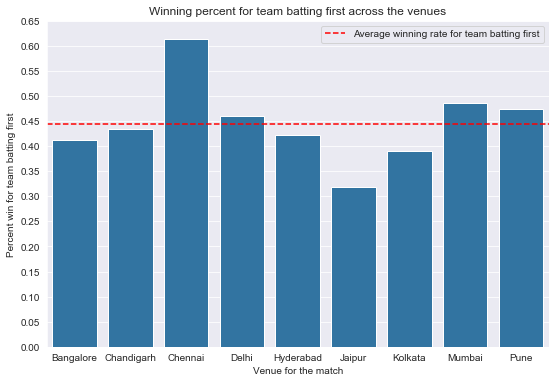

In [109]:
# Win percentage for team batting first on each venue
temp2 = temp.groupby(by='city').batting_first_won.mean()

plt.figure(figsize=(9,6))
sns.barplot(x=temp2.index, y=temp2, color='tab:blue')
plt.axhline(match.batting_first_won.mean(), color='r', label='Average winning rate for team batting first', linestyle='--')
plt.xlabel('Venue for the match')
plt.ylabel('Percent win for team batting first')
plt.title('Winning percent for team batting first across the venues')
plt.yticks(np.arange(0,0.7,0.05))
plt.legend()
plt.show()

As we saw earlier, the team batting first has a winning percent of 44.3%. However, across the stadiums in Chennai the team batting first wins whooping 61% of the games while this number is very low in Jaipur (32%). This could probably be explained from the fact that CSK which has a higher win percent among all teams mostly bats first when playing in Chennai.

Bangalore and Mumbai are venues that have higher than average runs scored (median of 170 runs) compared to Hyderabad which has lower scoring matches (median around 155).

In [74]:
major_teams= ['Hyderabad (Sunriser/Chargers)', 'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi (Capitals/ Daredevils)','Chennai Super Kings', 'Rajasthan Royals']
temp.pivot_table(index='city', columns='winner',values='batting_first_won', aggfunc='mean' )[major_teams]

winner,Hyderabad (Sunriser/Chargers),Kolkata Knight Riders,Kings XI Punjab,Royal Challengers Bangalore,Mumbai Indians,Delhi (Capitals/ Daredevils),Chennai Super Kings,Rajasthan Royals
city,,,,,,,,
Bangalore,0.333333,0.250000,0.400000,0.486486,0.333333,0.250000,0.600000,0.500000
Chandigarh,0.750000,0.333333,0.454545,0.333333,0.500000,0.000000,0.333333,0.666667
Chennai,0.500000,0.000000,1.000000,1.000000,0.400000,0.000000,0.650000,1.000000
Delhi,0.375000,0.200000,0.200000,0.500000,0.750000,0.580645,0.333333,0.250000
Hyderabad,0.454545,0.400000,0.250000,0.000000,0.714286,0.200000,0.666667,0.000000
Jaipur,1.000000,0.000000,1.000000,0.333333,0.500000,0.000000,0.333333,0.312500
Kolkata,0.500000,0.444444,0.333333,0.250000,0.500000,0.000000,0.200000,0.000000
Mumbai,0.600000,0.666667,0.800000,0.200000,0.566038,0.250000,0.181818,0.428571
Pune,1.000000,0.500000,0.000000,1.000000,0.250000,0.333333,0.500000,0.500000


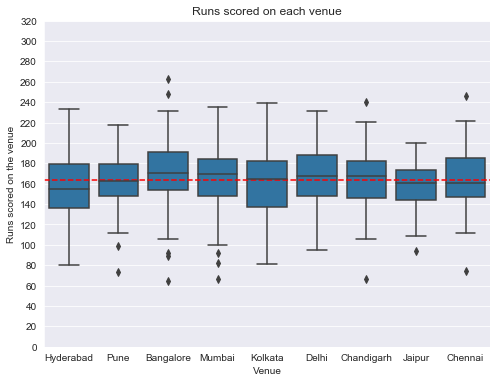

In [75]:
plt.figure(figsize=(8,6))

sns.boxplot(x=temp.city, y=temp.runs_1,color= 'tab:blue' )
plt.axhline(match.runs_1.median(), color='r', linestyle='--')
plt.yticks(np.arange(0,325,20))
plt.ylabel('Runs scored on the venue')
plt.xlabel('Venue')
plt.title('Runs scored on each venue')
plt.show()

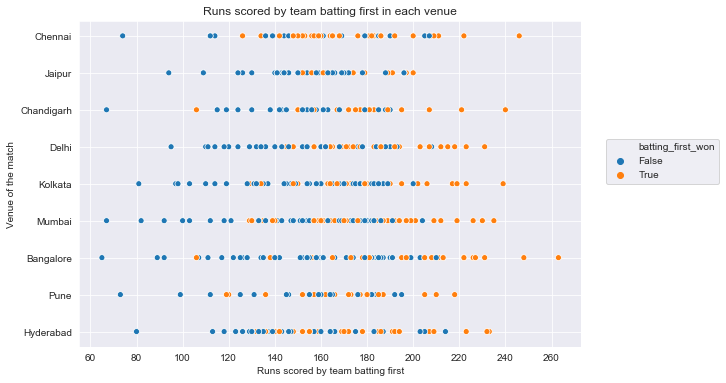

In [76]:
# Venue wise distribution for runs scored by team batting first
plt.figure(figsize=(9,6))
temp= match[match['city'].isin(major_city)]
sns.scatterplot(x= temp.runs_1, y= temp.city, hue= temp.batting_first_won, y_jitter= 1 )
plt.xticks(np.arange(60,270,20))
plt.legend(loc=(1.05,0.5))
plt.xlabel('Runs scored by team batting first')
plt.ylabel('Venue of the match')
plt.title('Runs scored by team batting first in each venue')
plt.show()

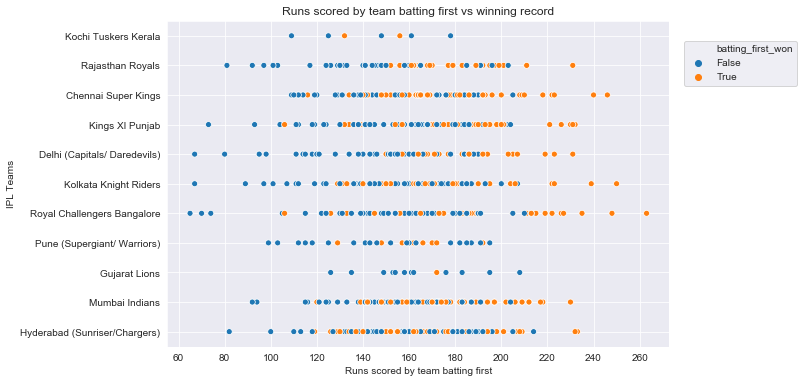

In [77]:
# Venue wise distribution for runs scored by team batting first
plt.figure(figsize=(9,6))
#temp= match[match['team1'].isin(major_teams)]
sns.scatterplot(x= match.runs_1, y= match.team1, hue= match.batting_first_won, y_jitter= 1 )
plt.xticks(np.arange(60,270,20))
plt.legend(loc=(1.03,0.8))
plt.xlabel('Runs scored by team batting first')
plt.ylabel('IPL Teams')
plt.title('Runs scored by team batting first vs winning record')
plt.show()

### Most runs scored in winning cause

In [78]:
# Merging the match winner to the Ball dataframe
ball= pd.merge(ball, match.loc[:,['id','winner']], left_on='match_id', right_on= 'id', how='left')

In [150]:
temp = ball[ball.batting_team== ball.winner].groupby(by=['batsman', 'match_id']).sum()['batsman_runs'].reset_index()
s1= temp.groupby(by='batsman').sum()['batsman_runs'].sort_values(ascending= False).head(15)

temp1= ball.groupby(by=['batting_team','match_id', 'batsman']).sum()['batsman_runs'].reset_index()
temp2= pd.merge(temp1, match[['id','winner']], left_on= 'match_id', right_on='id', how='left')
temp2['is_win'] = temp2.winner== temp2.batting_team
temp3= temp2.query('batsman_runs>50').groupby(by='batsman').mean()['is_win'].sort_values(ascending= False).reset_index()
temp4= pd.merge(temp3[temp3.batsman.isin(s1.index)], s1.reset_index(),on='batsman', how='inner').sort_values(by='batsman_runs', ascending= False)

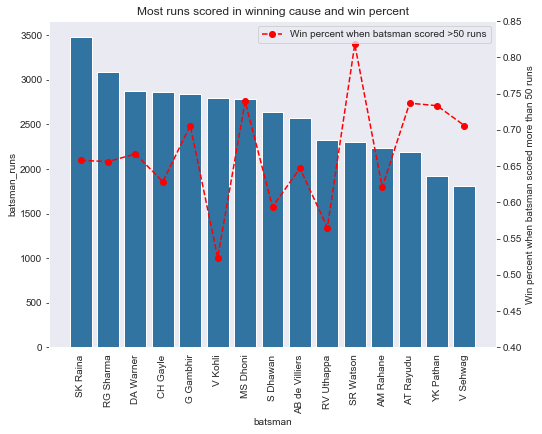

In [151]:
sns.set_style('dark')
plt.figure(figsize=(8,6))
sns.barplot(y= 'batsman_runs', x= 'batsman', data= temp4, color= 'tab:blue')
plt.xticks(rotation=90)
plt.title('Most runs scored in winning cause and win percent')
#plt.yticks('Runs scored by batsmen in winning cause')

axes= plt.twinx()
axes.plot(temp4.batsman, temp4.is_win,  'r--o', label='Win percent when batsman scored >50 runs')
plt.ylabel('Win percent when batsman scored more than 50 runs')
plt.yticks(np.arange(0.4,0.90,0.05))

plt.legend()
plt.show()

Suresh Raina, Rohit Sharma and David Warner have scored the most number of runs in winning causes. In fact, whenever Raina scored more than 50 runs, 66% of the times his team ended up winning the match.

However, whenever Shane Watson scored more than 50 runs, his team ended up winning more than 81% of the times. This win percent is 74% for MS Dhoni whenever he scored half century.

### Most Man of the Match awards

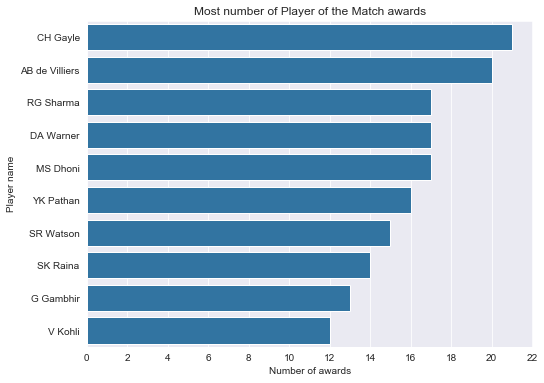

In [134]:
s= match.player_of_match.value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(y= s.index, x= s, color= 'tab:blue')
plt.xlabel('Number of awards')
plt.ylabel('Player name')
plt.title('Most number of Player of the Match awards')
plt.xticks(np.arange(0,24,2))
plt.show()

Chris Gayle and Ab de Villiers have won the most number of Player of the Match awards.

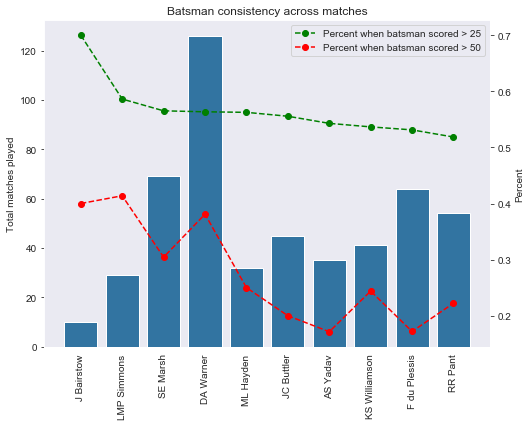

In [188]:
temp= ball.groupby(by=['batsman', 'match_id']).sum()['batsman_runs'].reset_index()

temp['>25']= temp.batsman_runs> 25
s1= temp.groupby(by='batsman').mean()['>25'].sort_values(ascending= False)
s2= temp.groupby(by='batsman').count()['match_id'].sort_values(ascending= False)

temp['>50']= temp.batsman_runs> 50
s3= temp.groupby(by='batsman').mean()['>50'].sort_values(ascending= False)

df1= pd.DataFrame([s1,s3,s2]).transpose()
temp2= df1.query('match_id>=10').head(10)

plt.figure(figsize=(8,6))
sns.barplot(x= temp2.index, y= temp2.match_id, color= 'tab:blue')
plt.xticks(rotation=90)
plt.ylabel('Total matches played')
plt.title('Batsman consistency across matches')

axes= plt.twinx()
axes.plot(temp2.index, temp2['>25'], 'g--o', label='Percent when batsman scored > 25')
axes.plot(temp2.index, temp2['>50'], 'r--o', label='Percent when batsman scored > 50')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Player name')
plt.ylabel('Percent')
plt.show()

To measure the consistency of batsmen I saw how many times they scored more than 25 runs and 50 runs across all the matches they played (should have played atleast 10 matches). 

J. Bairstow is the most consistent batsman who has scored atleast 25 runs in 70% of the matches he played. However, considering that Bairstow has played only 10 IPL matches, David Warner's record looks very impressive having scored more than 50 runs in 38% of the matches (and 25+ runs in 56% matches) and having played more than 120 matches.

In [189]:
temp2

,>25,>50,match_id
J Bairstow,0.700000,0.400000,10.0
LMP Simmons,0.586207,0.413793,29.0
SE Marsh,0.565217,0.304348,69.0
DA Warner,0.563492,0.380952,126.0
ML Hayden,0.562500,0.250000,32.0
JC Buttler,0.555556,0.200000,45.0
AS Yadav,0.542857,0.171429,35.0
KS Williamson,0.536585,0.243902,41.0
F du Plessis,0.531250,0.171875,64.0
RR Pant,0.518519,0.222222,54.0


# 5. Summary

It was really fun analyzing the IPL data and there feels that there is so much more that can be done. The key takeaways from my analysis are-

**Team Statistics** <br>
a) CSK has one of the highest win percents in the IPL games winning about 61% of its games followed by Mumbai Indians. All the teams have a better chasing record than batting first record (chasing team wins 55.7% matches).This difference is most prominent in Kolkata Knight Riders who have a win percent of 61% chasing but only 41% batting first.

b) About 24% of the games that were won by the batting first team, the winning margin was less than 10 runs. However, 38% of the games won by the winning team were won in the 20th over, showing how close the matches have been.

**Batsman Statistics** <br>
a) Virat Kohli and Suresh Raina are among the highest run scorers in IPL with each scoring more than 5400 runs. However, Chris Gayle also has one of the highest number of runs scored in boundaries with a whooping 76% runs being scored in 4s and 6s. 

b) Suresh Raina, Rohit Sharma and David Warner have scored the most number of runs in winning causes. In fact, whenever Raina scored more than 50 runs, 66% of the times his team ended up winning the match (it is 81% for Shane Watson and 74% for MS Dhoni).

c) J. Bairstow is the most consistent batsman who has scored atleast 25 runs in 70% of the matches he played. However, David Warner's record looks very impressive having scored more than 50 runs in 38% of the matches (and 25+ runs in 56% matches) and having played more than 120 matches.

**Bowler Statistics** <br>
a) Lasith Malinga  and Amit Mishra are one of the highest wicket takers in IPL. 43% of the wickets taken by Malinga have been either bowled or LBW. Bhuvaneshwar Kumar has one of the highest dot ball percents (41%) among the leading wicket takers.

b) Among major bowlers (who bowled more than 20 overs), Sohail Tanvir and A Chandillan are one of the most economical bowlers with an economy of around 6.22 and 6.28. However, Anil Kumble has one of the best economies in the death overs of 6.64. 

**Stadium Statistics** <br>
a) The team batting first has a winning chance of 44.3%. However, in Chennai the team batting first wins whooping 61% of the games while this number is very low in Jaipur (32%).